In [1]:
#
# Notebook configuration
#

# directory with gxl benchmark csv data
DATA="./data"

In [2]:
#
# imports
#
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#
# load all CSV data into one dataframe
#

csvs = glob.glob( os.path.join( DATA, "*.csv") )
##print(csvs)

dfs = []
for csv in csvs:
    df = pd.read_csv(csv,sep='\t')
    dfs.append(df)
df_all = pd.concat(dfs)
df_all

,Unnamed: 0,operation,subop,numboards,board_details,version,start,end,walltime,dataset
0,0,ledainfo,boards,4.0,"[""\x1b[1m\x1b[33mslot0\x1b[0m {'Apuc_Mask': '0...",NaN,NaN,NaN,NaN,deep-100M
1,1,build-index,cen_gen,NaN,NaN,GXL version 1.2,2023-11-15 14:48:38.701978,2023-11-15 14:59:02.604835,623.902857,deep-100M
2,2,build-index,knn_gen,NaN,NaN,GXL version 1.2,2023-11-15 14:59:02.604930,2023-11-15 15:11:53.668042,771.063112,deep-100M
3,3,build-index,knn_symmetric,NaN,NaN,GXL version 1.2,2023-11-15 15:11:53.668099,2023-11-15 15:13:34.360330,100.692231,deep-100M
4,4,build-index,index_gen,NaN,NaN,exesize=104096,2023-11-15 15:13:34.360426,2023-11-15 15:15:13.104314,98.743888,deep-100M
0,0,ledainfo,boards,4.0,"[""\x1b[1m\x1b[33mslot0\x1b[0m {'Apuc_Mask': '0...",NaN,NaN,NaN,NaN,deep-100M
1,1,build-index,cen_gen,NaN,NaN,GXL version 1.2,2023-11-15 16:06:03.388431,2023-11-15 16:16:14.016536,610.628105,deep-100M
2,2,build-index,knn_gen,NaN,NaN,GXL version 1.2,2023-11-15 16:16:14.016701,2023-11-15 16:29:03.427514,769.410813,deep-100M
3,3,build-index,knn_symmetric,NaN,NaN,GXL version 1.2,2023-11-15 16:29:03.427566,2023-11-15 16:30:43.118986,99.691420,deep-100M
4,4,build-index,index_gen,NaN,NaN,exesize=104096,2023-11-15 16:30:43.119157,2023-11-15 16:32:31.758436,108.639279,deep-100M


In [4]:
# 
# filter just what we need for plotting
#
df = df_all[ df_all["operation"]=='build-index' ][["operation", "subop", "walltime", "dataset" ] ]
df

,operation,subop,walltime,dataset
1,build-index,cen_gen,623.902857,deep-100M
2,build-index,knn_gen,771.063112,deep-100M
3,build-index,knn_symmetric,100.692231,deep-100M
4,build-index,index_gen,98.743888,deep-100M
1,build-index,cen_gen,610.628105,deep-100M
2,build-index,knn_gen,769.410813,deep-100M
3,build-index,knn_symmetric,99.691420,deep-100M
4,build-index,index_gen,108.639279,deep-100M
1,build-index,cen_gen,790.486784,deep-250M
2,build-index,knn_gen,1896.726243,deep-250M


In [5]:
# 
# create numeric size column useful for sorting later on
#

df['size'] = df.apply( lambda row: int(row['dataset'][0:-1].split('-')[1]), axis=1)
df

,operation,subop,walltime,dataset,size
1,build-index,cen_gen,623.902857,deep-100M,100
2,build-index,knn_gen,771.063112,deep-100M,100
3,build-index,knn_symmetric,100.692231,deep-100M,100
4,build-index,index_gen,98.743888,deep-100M,100
1,build-index,cen_gen,610.628105,deep-100M,100
2,build-index,knn_gen,769.410813,deep-100M,100
3,build-index,knn_symmetric,99.691420,deep-100M,100
4,build-index,index_gen,108.639279,deep-100M,100
1,build-index,cen_gen,790.486784,deep-250M,250
2,build-index,knn_gen,1896.726243,deep-250M,250


['deep-1M', 'deep-10M', 'deep-20M', 'deep-50M', 'deep-100M', 'deep-100M', 'deep-250M']
[29.346148, 138.651422, 286.283137, 623.377988, 623.902857, 610.628105, 790.486784]
[29.346148, 138.651422, 286.283137, 623.377988, 623.902857, 610.628105, 790.486784]
[0.678638, 6.809395, 16.0482, 46.46329, 100.692231, 99.69142, 246.767825]
[0.969306, 11.406921, 21.21245, 51.606972, 98.743888, 108.639279, 281.614139]
GXL version 1.2


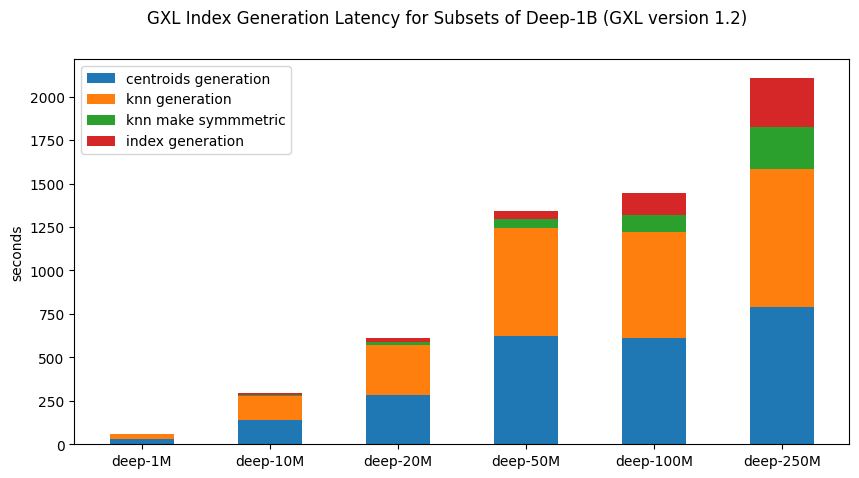

In [6]:
# 
# create the bar chart
#

# bar chart x-axis labels
dsets_x = df[ df['subop']=='cen_gen' ].sort_values(['size'])['dataset'].tolist()
print(dsets_x)

# get cen gen bars
cen_gen = df[ df['subop']=='cen_gen' ].sort_values(['size'])['walltime'].tolist()
print(cen_gen)

# get knn gen bars
knn_gen = df[ df['subop']=='cen_gen' ].sort_values(['size'])['walltime'].tolist()
print(knn_gen)

# get knn gen bars
knn_symmetric = df[ df['subop']=='knn_symmetric' ].sort_values(['size'])['walltime'].tolist()
print(knn_symmetric)

# get index gen bars
index_gen = df[ df['subop']=='index_gen' ].sort_values(['size'])['walltime'].tolist()
print(index_gen)

# create dict of bar items
bar_items = {\
    "centroids generation": cen_gen, \
    "knn generation": knn_gen, \
    "knn make symmmetric": knn_symmetric, \
    "index generation": index_gen \
}

# get GXL version string

vers = list( df_all.dropna(subset=['version'])['version'].unique() )[0] # TODO: its lame
print(vers)

# bar chart setup
width = 0.5
fig, ax = plt.subplots(figsize=(10,5))
bottom = np.zeros( len(dsets_x) )

# plot bar chart
for boolean, weight_count in bar_items.items():
    p = ax.bar(dsets_x, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.legend(loc='upper left')
ax.set_ylabel('seconds')
fig.suptitle('GXL Index Generation Latency for Subsets of Deep-1B (%s) ' % vers)

fig.savefig('./data/gxl_index_gen_latency.png')

   A  B  C  D
0  1  2  3  4
1  2  3  4  5
2  3  4  5  6
3  4  5  6  7
0    2
1    3
2    4
3    5
Name: B, dtype: int64
0    1
1    2
2    3
3    4
Name: A, dtype: int64


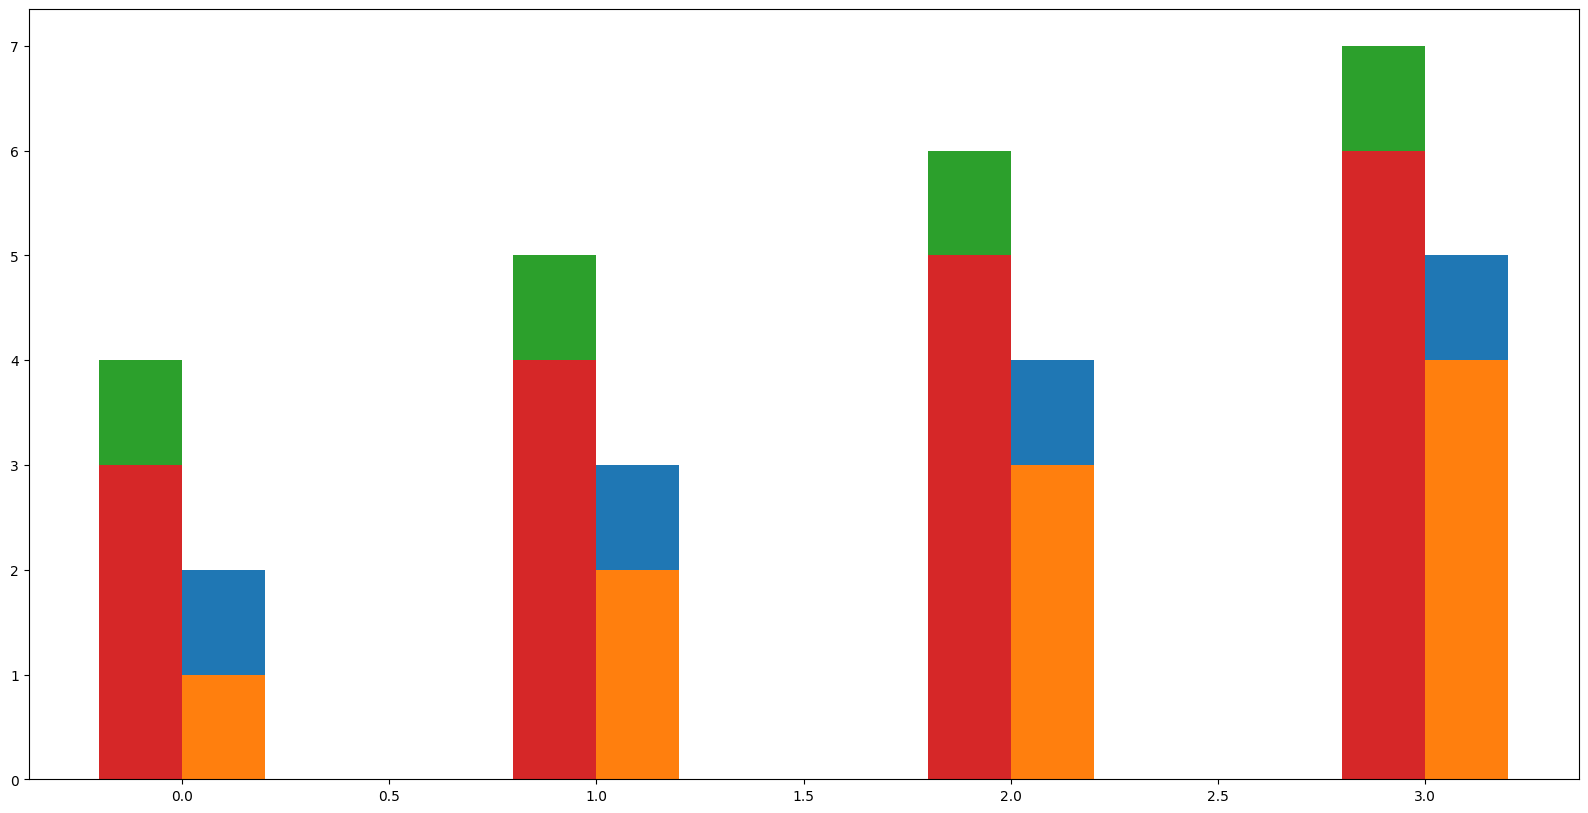

In [7]:
import pandas as pd

df = pd.DataFrame(dict(
    A=[1, 2, 3, 4],
    B=[2, 3, 4, 5],
    C=[3, 4, 5, 6],
    D=[4, 5, 6, 7]))
print(df)
print(df.B)
print(df.A)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 10))

ab_bar_list = [plt.bar([0, 1, 2, 3], df.B, align='edge', width= 0.2),
               plt.bar([0, 1, 2, 3], df.A, align='edge', width= 0.2)]

cd_bar_list = [plt.bar([0, 1, 2, 3], df.D, align='edge',width= -0.2),
               plt.bar([0, 1, 2, 3], df.C, align='edge',width= -0.2)]